In [2]:
from google.colab import files
file_uploaded = files.upload()

Saving vgames2 (16).xlsx to vgames2 (16).xlsx


In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("vgames2 (16).xlsx")

In [4]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,16395,Point Blank 3,PS,2000,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00
1,9277,Trade & Battle: Card Hero,GB,2000,Strategy,Nintendo,0.00,0.00,0.20,0.00
2,14667,Strider 2,PS,2000,Platform,Virgin Interactive,0.05,0.03,0.00,0.01
3,2250,SplashDown,PS2,2001,Racing,Atari,0.34,0.27,0.00,0.09
4,8682,NCAA Football 2002,PS2,2001,Sports,Electronic Arts,0.77,0.60,0.00,0.20
...,...,...,...,...,...,...,...,...,...,...
16588,5311,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00
16589,12356,Fullmetal Alchemist: Brotherhood,PSP,2017,Action,Namco Bandai Games,0.00,0.00,0.03,0.00
16590,10108,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00
16591,15234,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00


In [5]:
# Sales 들에 있는 K 바꾸기
df_sam = df["NA_Sales"]

for i in range(len(df_sam)):
  if type(df_sam[i]) == str:
    temp = df_sam[i]
    df_sam[i] = float(temp[: len(temp)-1]) * 0.001

df["NA_Sales"] = df_sam

In [6]:
df_sam = df["EU_Sales"]

for i in range(len(df_sam)):
  if type(df_sam[i]) == str:
    temp = df_sam[i]
    df_sam[i] = float(temp[: len(temp)-1]) * 0.001

df["EU_Sales"] = df_sam

In [7]:
df_sam = df["JP_Sales"]

for i in range(len(df_sam)):
  if type(df_sam[i]) == str:
    temp = df_sam[i]
    df_sam[i] = float(temp[: len(temp)-1]) * 0.001

df["JP_Sales"] = df_sam

In [8]:
df_sam = df["Other_Sales"]

for i in range(len(df_sam)):
  if type(df_sam[i]) == str:
    temp = df_sam[i]
    df_sam[i] = float(temp[: len(temp)-1]) * 0.001

df["Other_Sales"] = df_sam

In [9]:
# df.to_excel("project_test_data.xlsx")
# files.download("project_test_data.xlsx")

In [10]:
# 총판매량 계산
df["Total_Sales"] = df['NA_Sales'] +df["EU_Sales"] + df["JP_Sales"] + df['Other_Sales']

## 1. 연도별 게임 트렌드가 있을까?

- 게임 트렌드 -> 장르마다 발매된 횟수만 많으면 트렌드? (x)
-                많이 팔린 게임이 시대의 트렌드를 주도한다! (o)

In [11]:
#2번
# 각 년도마다 장르별 총판매량 표 생성
df_sam1 = df[["Genre","Year","Total_Sales"]]

df_sam1.sort_values("Year", inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_sam1

In [50]:
# df_sam1[df_sam1["Year"] == 1977]

df_sam3 = df_sam1.groupby(["Year", "Genre"]).sum()

df_sam3.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


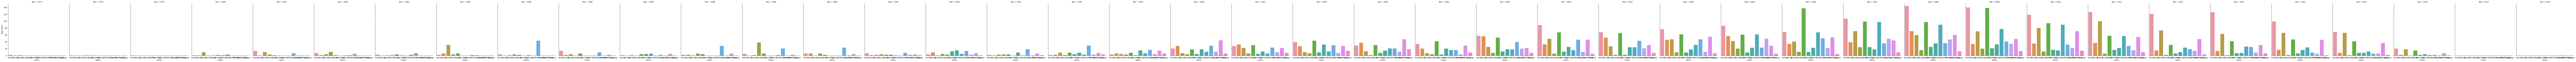

In [51]:
# 년도마다 장르별 판매량 그래프 그리기
sns.factorplot(x="Genre", y="Total_Sales", col="Year", data=df_sam3, kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


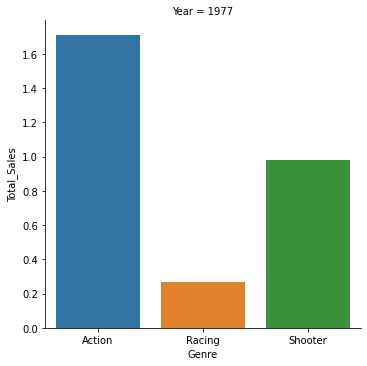

In [52]:
sns.factorplot(x="Genre", y="Total_Sales", col="Year", data=df_sam3[df_sam3["Year"] == 1977], kind="bar")

## 2. 지역에 따라서 선호하는 게임 장르가 다를까?

- 선호한다 = 판매량이 많다
- -> 지역에 따라서 판매량이 많은 게임 장르는 다른가? 혹은 비슷한가?
- -> 지역마다 판매량의 분포는 동일한가?

In [16]:
# a = np.array([10,5,10,5,10,5])
# b = np.array([1000,500,1000,500,1000,500])
# stats.ttest_ind(a/a.mean(),b/b.mean())

In [17]:
# c = np.array([0.9,0.1,0,0,0,0,0,0,0,0])
# d = np.array([0,0,0,0,0,0,0,0,0.1,0.9])
# stats.ttest_ind(c,d)

In [18]:
# temp = pd.DataFrame({"c":c+0.1,"d":(c+0.1)*100})
# stats.chi2_contingency(temp)

In [20]:
# 각 지역마다 장르별 판매량 표 생성
df_table = df[["NA_Sales", "EU_Sales","JP_Sales", "Other_Sales","Total_Sales"]].groupby(df["Genre"]).sum()

In [21]:
df_table

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,874.65,522.33,159.18,186.68,1742.84
Adventure,105.61,64.13,50.99,16.65,237.26
Fighting,223.35,101.27,87.48,36.65,448.75
Misc,408.05,212.36,105.27,74.04,799.72
Platform,446.44,201.61,130.65,51.53,830.23
Puzzle,123.35,50.73,56.87,12.52,243.47
Racing,357.19,237.09,56.40,77.10,727.78
Role-Playing,319.54,183.58,344.95,56.96,905.03
Shooter,581.92,313.05,38.26,102.65,1035.88


In [22]:
print(stats.chi2_contingency(df_table))

print("p-value값이 5%이하로 나왔으므로 장르와 각 지역별 '판매량' 사이에는 어떤 관계가 존재한다")

(695.0516314677883, 5.63410666406562e-118, 44, array([[ 859.64002883,  476.05514784,  251.38338534,  155.77323466,
        1742.82820332],
       [ 117.05593838,   64.82374038,   34.2305117 ,   21.21141588,
         237.31839366],
       [ 221.34186898,  122.575651  ,   64.72670708,   40.10881036,
         448.74696257],
       [ 394.45463947,  218.44278467,  115.34984332,   71.47814557,
         799.71458697],
       [ 409.50342036,  226.77656319,  119.75053821,   74.20509778,
         830.22438046],
       [ 120.08937012,   66.50360724,   35.11757409,   21.76109651,
         243.46835204],
       [ 358.97088671,  198.79243964,  104.97337689,   65.04822286,
         727.77507391],
       [ 446.3978422 ,  247.2081146 ,  130.53952471,   80.89064433,
         905.02387416],
       [ 510.93841837,  282.94967212,  149.41303918,   92.58588185,
        1035.87298849],
       [ 193.09889312,  106.93513451,   56.46765138,   34.99097085,
         391.48735014],
       [ 654.55044862,  362.47975

In [23]:
# 각 지역의 장르별 판매량 "분포 or 비율"의 관계를 보기 위해 조건을 동등하게 맞춰줌
df_table2 = df_table / df_table.mean()    #시장규모 억제

In [24]:
df_table2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,2.400532,2.588676,1.493970,2.827450,2.359353
Adventure,0.289853,0.317829,0.478562,0.252180,0.321188
Fighting,0.612998,0.501896,0.821036,0.555100,0.607491
Misc,1.119919,1.052459,0.988002,1.121408,1.082613
Platform,1.225283,0.999182,1.226204,0.780472,1.123916
Puzzle,0.338542,0.251419,0.533748,0.189628,0.329595
Racing,0.980331,1.175022,0.529337,1.167754,0.985225
Role-Playing,0.876998,0.909825,3.237498,0.862714,1.225176
Shooter,1.597116,1.551481,0.359086,1.554734,1.402312


In [25]:
print(stats.chi2_contingency(df_table2))

print("p-value > 0.05 이므로 지역별 판매량 '분포'와 장르는 서로 독립적일 수 있다. 즉, 어느 지역이냐에 따라서 장르별 판매량은 관계가 없으므로 게임장르의 선호도는 비슷하고 판단할 수 있다.")

(5.501061158047746, 0.9999999999997002, 44, array([[2.33399599, 2.33399599, 2.33399599, 2.33399599, 2.33399599],
       [0.33192271, 0.33192271, 0.33192271, 0.33192271, 0.33192271],
       [0.61970409, 0.61970409, 0.61970409, 0.61970409, 0.61970409],
       [1.07288031, 1.07288031, 1.07288031, 1.07288031, 1.07288031],
       [1.07101136, 1.07101136, 1.07101136, 1.07101136, 1.07101136],
       [0.32858632, 0.32858632, 0.32858632, 0.32858632, 0.32858632],
       [0.96753377, 0.96753377, 0.96753377, 0.96753377, 0.96753377],
       [1.42244218, 1.42244218, 1.42244218, 1.42244218, 1.42244218],
       [1.2929458 , 1.2929458 , 1.2929458 , 1.2929458 , 1.2929458 ],
       [0.53370626, 0.53370626, 0.53370626, 0.53370626, 0.53370626],
       [1.76804986, 1.76804986, 1.76804986, 1.76804986, 1.76804986],
       [0.25722135, 0.25722135, 0.25722135, 0.25722135, 0.25722135]]))
p-value > 0.05 이므로 지역별 판매량 '분포'와 장르는 서로 독립적일 수 있다. 즉, 어느 지역이냐에 따라서 장르별 판매량은 관계가 없으므로 게임장르의 선호도는 비슷하고 판단할 수 있다.


In [26]:
# 시각화를 위한 tidy data로 변환

df_temp = df_table2.reset_index().melt(id_vars = ["Genre"], value_vars=["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Total_Sales"])

In [ ]:
df_temp

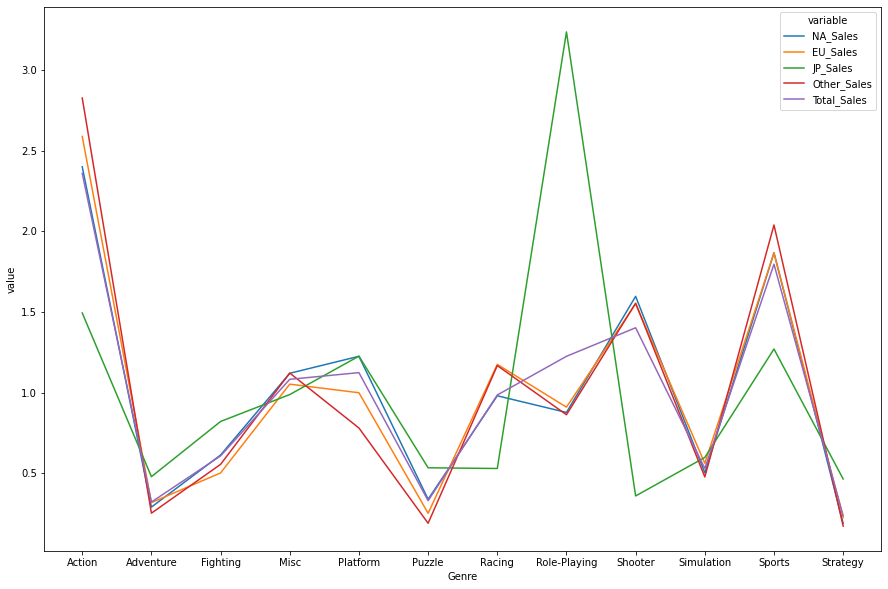

In [28]:
# 장르별 지역 판매량 그래프들 그리기
plt.figure(figsize=(15,10))

sns.lineplot(data = df_temp, x="Genre", y="value", hue="variable")

plt.show()

## 3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [29]:
from google.colab import files
file_uploaded = files.upload()

Saving Best Seller.xlsx to Best Seller.xlsx


In [30]:
# 시리즈별로 판매량을 합산한 데이터 불러오기
df_best = pd.read_excel("Best Seller.xlsx")

df_best

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,temp
0,Call of Duty total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.54,251.54
1,Pokemon total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.23,250.23
2,Super Mario total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.74,242.74
3,Mario total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.36,213.36
4,Grand Theft Auto toal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.40,157.40
...,...,...,...,...,...,...,...,...,...,...,...
16778,Space Channel 5: Ulala's Cosmic Attack,GBA,2002.0,Misc,Atari,0.01,0.00,0.0,0.0,0.01,NaN
16779,Space Hulk,PSV,2015.0,Strategy,Funbox Media,0.00,0.01,0.0,0.0,0.01,NaN
16780,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.00,NaN
16781,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,PS3,2007.0,Adventure,Sony Computer Entertainment,0.00,0.08,0.0,NaN,NaN,NaN


In [31]:
df_best.fillna(0, inplace=True)

# 출고량이 제일 높은 100개의 데이터 중에서 시리즈가 아닌 게임 하나만으로 판매량이 높은 데이터만 추출하기
df_one = df_best[:101][df_best["Platform"]!=0]
df_one

# 시리즈, 단독 가리지 않고출고량이 제일 높은 100개의 데이터 추출
df_best = df_best[:101][["Name","Platform","Total_Sales"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [ ]:
df_best.head(60)

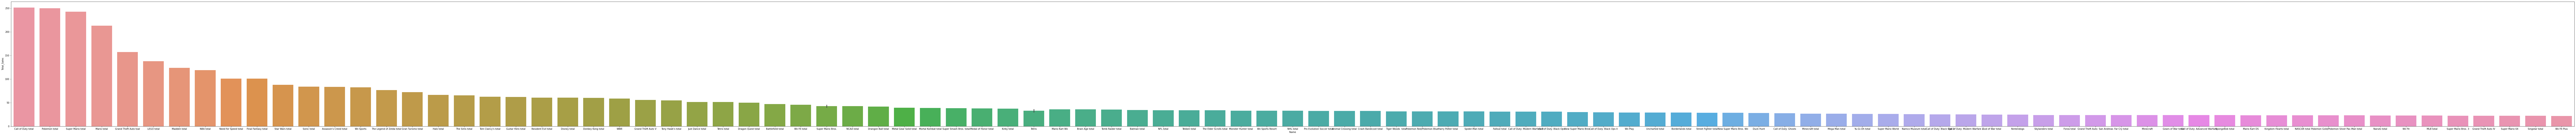

In [33]:
# 시리즈, 단독 구분하지 않고서 판매량만으로 줄을 세워놓은 그래프
plt.figure(figsize=(200,10))

sns.barplot(data=df_best, x="Name", y="Total_Sales")

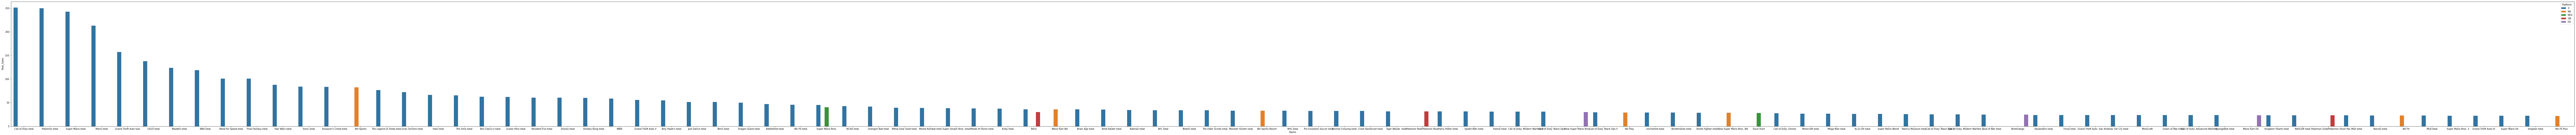

In [34]:
# 시리즈 합쳤을 때의 판매량과 게임 한개의 판매량을 구분해놓은 경우

plt.figure(figsize=(200,10))

sns.barplot(data=df_best, x="Name", y="Total_Sales", hue="Platform")

In [35]:
# 게임 하나만으로 압도적인 판매량을 자랑하는 데이터를 모아놓기
df_one_table = df_one[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Total_Sales"]].groupby(df_one["Name"]).mean()
df_one_table.sort_values("Total_Sales", ascending=False, inplace=True)

In [ ]:
# 게임마다 지역별 판매량을 보기 위한 그래프 밑준비
df_one_temp = df_one_table.reset_index().melt(id_vars = ["Name"], value_vars=["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Total_Sales"])
df_one_temp.sort_values("variable", inplace=True)
df_one_temp

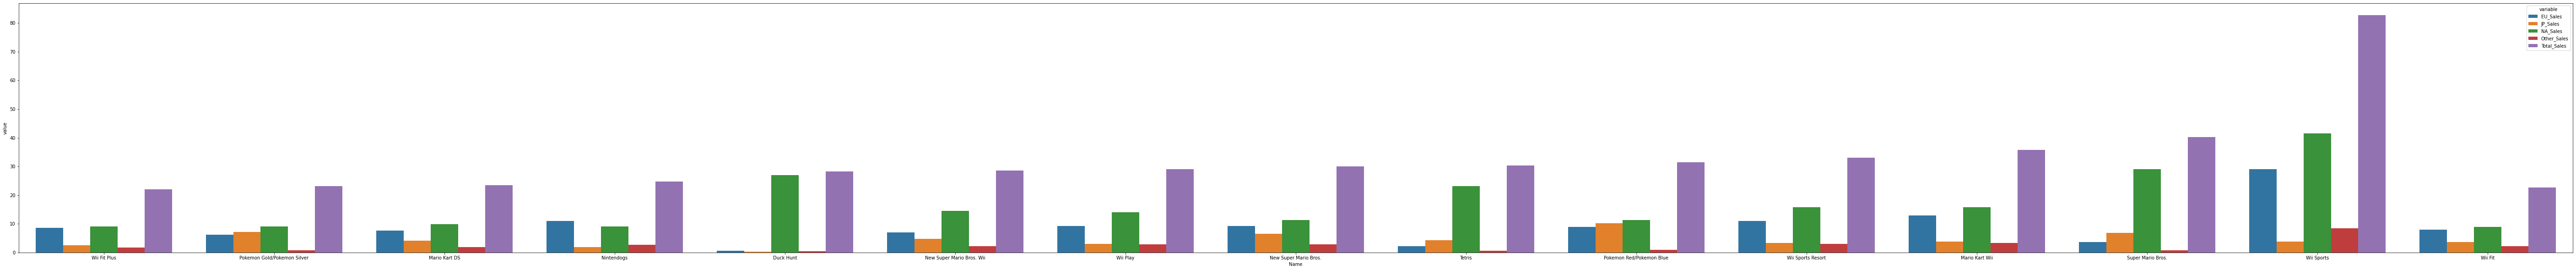

In [37]:
# 게임마다 지역별 판매량 그래프
plt.figure(figsize=(100,10))
sns.barplot(data= df_one_temp, x="Name", y="value", hue="variable")

### 출고량 100위권 안에 든 게임들을 살펴보자. 이때, 게임 하나의 출고량으로만 100위권 안에 든 게임은 총 15종이 있다.
> - Wii 종류: Wii sports, Wii sports Resort, Wii play, Wii Fit, Wii Fit Plus
- Mario 종류: Super Mario Bros, Mario Kart Wii, New Super Mario Bros., New Super Mario Bros. Wii, Mario Kart DS
- Pokemon 종류: Pokemon Red/Blue, Pokemon Gold/Silver
- 그 외: Tetris, Duck Hunt, Nintendog

### 그 외 나머지 85종은 시리즈 게임들이 차지하고 있다.

##여기서 판매량 100위 안의 게임들의 특징을 몇 가지 살펴보자
> 1. 우선 주목해야 할 점은 판매량이 우수한 게임은 시리즈 게임이라는 부분이다. 콜 오브 듀티, GTA, 어새신 크리드, 젤다의 전설 등등 여러 시리즈 게임들은 가히 천문학적인 출고량을 기록하고 있는데 이들은 전부 시리즈로 나온 게임이다. 하물며 게임 하나의 출고량으로 100위권 안에 든 게임들에서도 시리즈인 게임들이 과반수가 넘는다.
> 2. 이어서 게임 종류에 대해서 보자면, 여러 스포츠에 대한, 이를테면 럭비, 축구, 농구, 야구 등, 게임들이 하나씩 있다는 점이 있다. 다만 각 스포츠 분야당 대표하는 게임은 한 종류씩밖에 없다. 이는 해당 시장이 선점한 뒤에는 후발주자들이 뛰어들어서 성공하기 어려운 구조 때문으로 생각된다.
> 3. 나머지 게임들을 살펴보면 크게 두가지로 구분할 수 있다. 과거에 성공해서 지금까지 이름값을 날리는 게임과 IP를 빌려서 만들어졌기 때문에 팬층이 구매해준 게임들로 말이다. 전자의 경우는, 콜 오브 듀티, 툼 레이더, GTA 등이 있고, 후자의 경우는, 해리포터, 나루토, 스파이더맨, 스폰지밥 등이 있다.


- 따라서 게임 하나로 히트를 칠 자신이 있는 경우가 아닌 바에야 대형 IP에 탑승해서 가는 것이 나을 것이라고 생각한다. 하다못해 소규모 IP의 경우에라도 코어한 팬층이 최소한도의 매상을 보장해 줄 것이라고 생각한다.
- p.s) 좀 과거의 이야기지만, Fate 시리즈 게임 총 판매량은 약 110만장 정도이다. 하지만 해당 IP를 이용한 스마트폰 게임의 매출은 19년도 기준으로 약 4.5조에 해당하였다. 즉, IP를 적절하게 사용하면 높은 매출을 얻을 수 있다고 예측하는 바이다. 